$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

**Build a binary classifier to classify digit 0 against all the other digits at MNIST dataset.**

**1. Compute an optimal model parameter using the training dataset**

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import *

#
# Load MNIST training dataset
#
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data    	= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image
im_size = size_row * size_col    # 784
num_image	= len(data)  # 60000
count   	= 0     # count for the number of images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    
    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:
    line_data   = line.split(',')
    label       = int(line_data[0])   # Convert string to integer type
    im_vector   = np.asfarray(line_data[1:])
    #im_vector   = normalize(im_vector)
    
    if label == 0:
        list_label[count] = 0
    else:
        list_label[count] = -1
    list_image[:, count] = im_vector.copy()
    
    count += 1

In [89]:
A = np.empty((num_image, im_size+1), dtype=float)
b = np.empty((num_image, 1), dtype=float)

# Noise for obtaining the inverse matrix
for i in range(num_image):
    for j in range(im_size+1):
        if j == 0:
            A[i, j] = 1
        else:
            A[i, j] = list_image[j-1, i] + np.random.rand()

The prediction function f_w(x) should have the following values:

$f_w(x) = +1$  if label(x) = 0

$f_w(x) = -1$ if label(x) is not 0

In [90]:
for i in range(num_image):
    if list_label[i] == 0:
        b[i] = 1
    else:
        b[i] = -1

A = np.asmatrix(A)
b = np.asmatrix(b)

theta = inv(A.T*A)*A.T*b
th = np.asfarray(theta)

**2. Compute (1) True Positive, (2) False Positive, (3) True Negative, (4) False Negative based on the computed optimal model parameter using (1) training dataset and (2) testing dataset.**

In [91]:
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
test_data    	= handle_file.readlines()
handle_file.close()

size_data = len(test_data)    # 10000
count = 0   # count for the number of images

#
# make a matrix each column of which represents an images in a vector form
#
test_image  = np.empty((size_row * size_col, size_data), dtype=float)
test_label  = np.empty(size_data, dtype=int)


for line in test_data:
    test_line   = line.split(',')
    label       = int(test_line[0])   # Convert string to integer type
    test_vector   = np.asfarray(test_line[1:])
    #test_vector   = normalize(test_vector)
    
    if label == 0:
        test_label[count] = 0
    else:
        test_label[count] = -1
    test_image[:, count]    = test_vector
    count += 1


In [92]:
test_A = np.empty((size_data, im_size+1), dtype=float)
test_b = np.matrix((size_data, 1), dtype=float)

for i in range(size_data):
    for j in range(im_size+1):
        if j == 0:
            A[i, j] = 1
        else:
            A[i, j] = test_image[j-1, i]

test_A = np.asmatrix(A)
test_b = test_A * theta

zero_cnt = 0  # answer positive count
nzero_cnt = 0  # answer negative count 
tp = 0    # true positive count
fp = 0    # false positive count
tn = 0    # true negative count
fn = 0    # false negative count

accuracy = np.empty(size_data, dtype=float)

true_positive = np.empty(size_data, dtype=float)
false_positive = np.empty(size_data, dtype=float)
true_negative = np.empty(size_data, dtype=float)
false_negative = np.empty(size_data, dtype=float)

for i in range(size_data):
    if test_label[i] == 0:  # if label is '0'
        if test_b[i] > 0:
            tp += 1
        else:
            fn += 1
        zero_cnt += 1
    elif test_label[i] == -1:
        if test_b[i] <= 0:
            tn += 1
        else:
            fp += 1
        nzero_cnt += 1
    
    if zero_cnt != 0:
        true_positive[zero_cnt] = (tp / zero_cnt) * 100
        false_negative[zero_cnt] = (fn / zero_cnt) * 100
    
    if nzero_cnt != 0:
        true_negative[nzero_cnt] = (tn / nzero_cnt) * 100
        false_positive[nzero_cnt] = (fp / nzero_cnt) * 100
    
    # testing accuracy
    accuracy[i] = (tp + tn) / (zero_cnt + nzero_cnt) * 100

**[Accuracy]**

**Testing Accuracy**

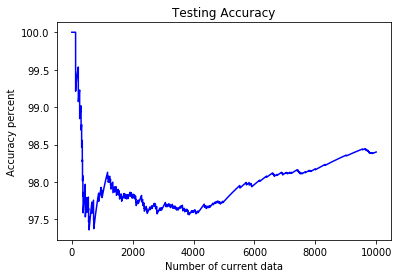

In [98]:
x = range(size_data)
y = accuracy[x]
plt.plot(x, y, "BLUE")
plt.title('Testing Accuracy')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy percent')
plt.show()

**True Positive**

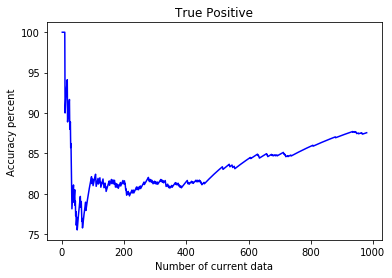

In [99]:
x = range(1, zero_cnt+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('True Positive')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy percent')
plt.show()

**False Negative**

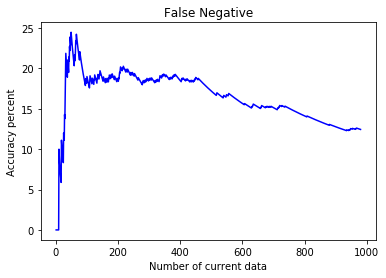

In [100]:
x = range(1, zero_cnt+1)
y = false_negative[x]
plt.plot(x, y, "BLUE")
plt.title('False Negative')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy percent')
plt.show()

**True Negative**

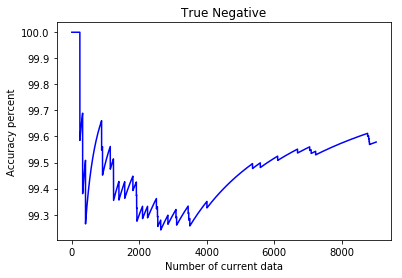

In [101]:
x = range(1, nzero_cnt+1)
y = true_negative[x]
plt.plot(x, y, "BLUE")
plt.title('True Negative')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy percent')
plt.show()

**False Positive**

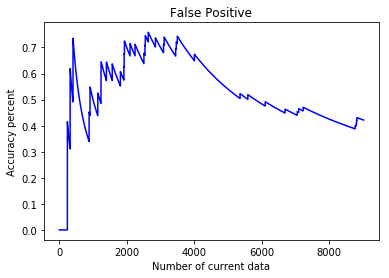

In [102]:
x = range(1, nzero_cnt+1)
y = false_positive[x]
plt.plot(x, y, "BLUE")
plt.title('False Positive')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy percent')
plt.show()